# Clustering Cibo Labs Landscape Segments

In [86]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler



# Paths
SEGMENTS = 'data/cibo_landscape_response_segments.fgb'
BOUNDING_BOX_EPSG3577 = [258119,-2096127,497606,-1845765]
CLUSTERED_SEGMENTS = 'data/clustered_segments.fgb'

## Load the segment data into a dataframe

In [87]:
# Read the data in, using a bounding box filter. 
# The rows = 10000 provides an upper limit in case the bounding box is too large.
segmentData = gp.read_file(SEGMENTS, bbox = BOUNDING_BOX_EPSG3577, rows = 100000)
# Shuffle the data
segmentData.sample()
print(list(segmentData))

['fid', 'segid', 'histogram', 'pca_Band_1_mean', 'pca_Band_1_std', 'pca_Band_2_mean', 'pca_Band_2_std', 'pca_Band_3_mean', 'pca_Band_3_std', 'pca_Band_4_mean', 'pca_Band_4_std', 'landtype_mode', 'landuse_mode', 'slope_relief_mode', 's2_NDWI_p75_mean', 's2_NDWI_p75_std', 's2_NDVI_p5_mean', 's2_NDVI_p5_std', 'PG_mean', 'PG_std', 'barestEarth_Band_1_mean', 'barestEarth_Band_1_std', 'barestEarth_Band_2_mean', 'barestEarth_Band_2_std', 'barestEarth_Band_3_mean', 'barestEarth_Band_3_std', 'barestEarth_Band_4_mean', 'barestEarth_Band_4_std', 'barestEarth_Band_5_mean', 'barestEarth_Band_5_std', 'barestEarth_Band_6_mean', 'barestEarth_Band_6_std', 'bareStats_Band_1_mean', 'bareStats_Band_1_std', 'bareStats_Band_2_mean', 'bareStats_Band_2_std', 'bareStats_Band_3_mean', 'bareStats_Band_3_std', 'bareStats_Band_4_mean', 'bareStats_Band_4_std', 'bareStats_Band_5_mean', 'bareStats_Band_5_std', 'bareStats_Band_6_mean', 'bareStats_Band_6_std', 'bareStats_Band_7_mean', 'bareStats_Band_7_std', 'bareStats

## Select the attributes to be used for clustering

In [88]:
wantedAttributes = ['pca_Band_1_mean', 'pca_Band_2_mean', 'pca_Band_3_mean', 'pca_Band_4_mean', 'landtype_mode', 'slope_relief_mode', 's2_NDWI_p75_mean', 's2_NDVI_p5_mean', 'bareStats_Band_1_mean', 'bareStats_Band_2_mean', 'bareStats_Band_3_mean', 'bareStats_Band_4_mean', 'bareStats_Band_5_mean', 'bareStats_Band_6_mean', 'bareStats_Band_7_mean', 'bareStats_Band_8_mean']
# Select the columns we want
clusterData = segmentData[wantedAttributes]

## Scale the data
clusterData = RobustScaler().fit_transform(clusterData)
print(clusterData.shape)

(82935, 16)


## Find the optimal number of clusters

2 735274.9102995726 0.12834370030914605
4 546065.4836204111 0.3227362526153812
6 399767.7423921915 0.284237375713061
7 317745.9135815957 0.2829323616131279
9 524098.2581693983 0.2136815554520734
11 427707.32684561715 0.24060867094790234
13 444933.33018655196 0.2346772148363266
16 441527.1007123404 0.21543970361334655
18 453520.7862038874 0.196178475241617
20 408837.6690011129 0.1848808382630428
22 400779.2540098742 0.18396164869533665
25 134502.72302267063 0.2015514678593396


Text(0.5, 0, 'Number of clusters')

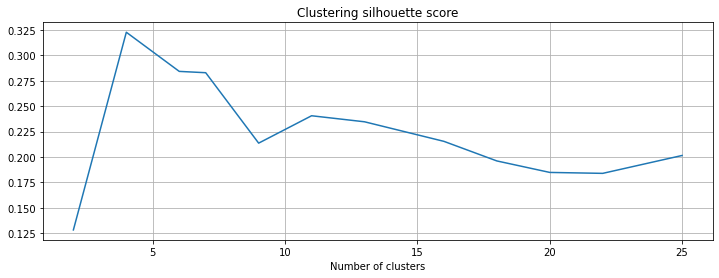

In [89]:
# Select a subset for testing number of clusters
X = clusterData[np.random.choice(len(clusterData),20480,replace=False)]

# Run the clustering for various class numbers
inertia = []
silhouette = []
nclasses = np.round(np.arange(2,14)**1.25).astype(int)
for c in nclasses:
    kmeans = MiniBatchKMeans(n_clusters=c).fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))
    print(c,inertia[-1],silhouette[-1])

# Plot the silhouette score
plt.figure(figsize=(12,4))
plt.plot(nclasses, silhouette)
plt.grid()
plt.title('Clustering silhouette score')
plt.xlabel('Number of clusters')

## Cluster the complete dataset and write to a new file

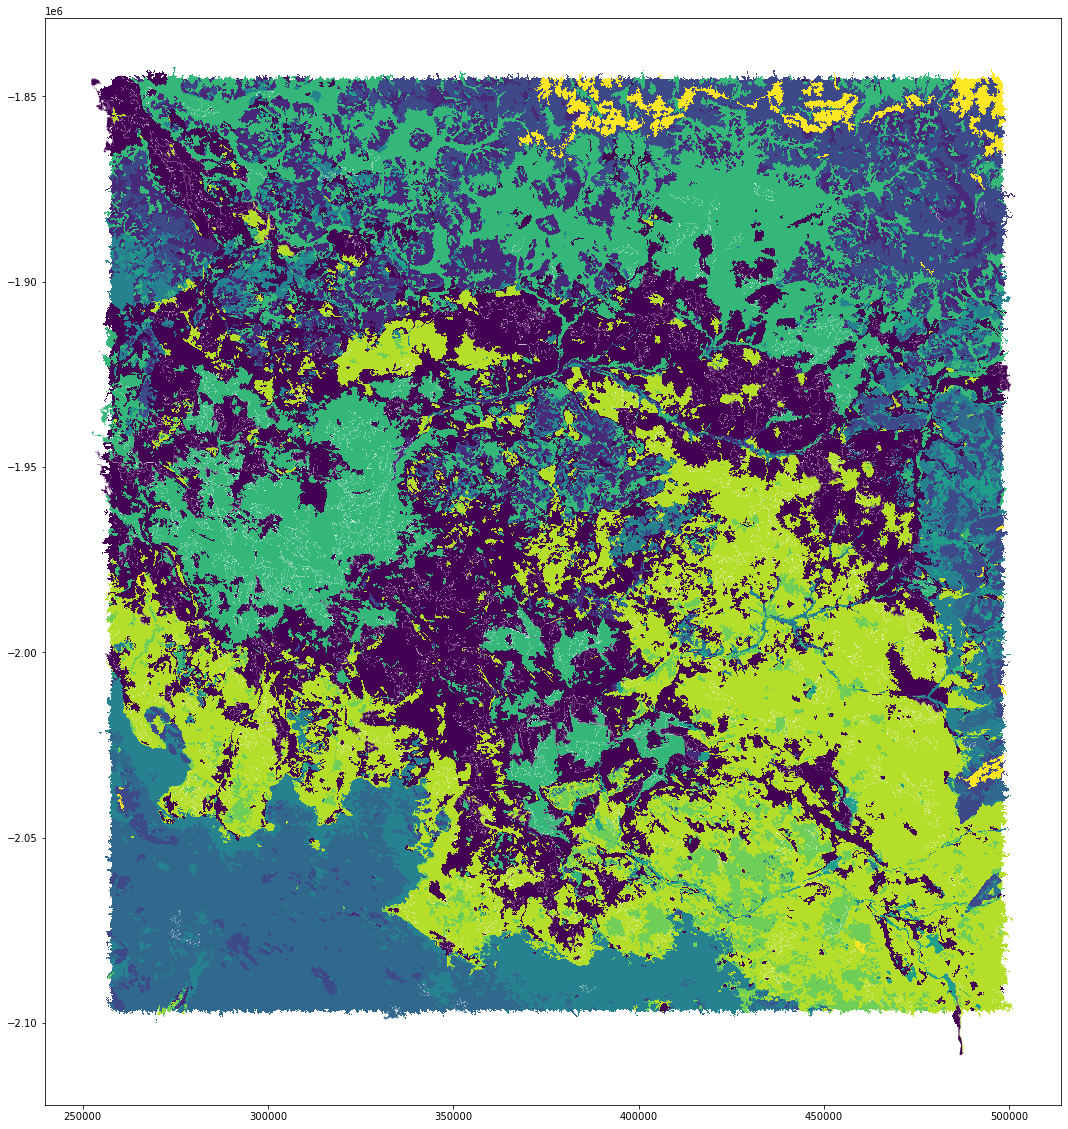

In [90]:
# Cluster the full dataset
kmeans = MiniBatchKMeans(n_clusters=10).fit(clusterData)
# Add the cluster labels as a new attribute
segmentData['cluster'] = kmeans.labels_
# Plot the output
segmentData.plot(column='cluster',figsize=(20,20))
# Write to a new file
segmentData.to_file(CLUSTERED_SEGMENTS , driver='FlatGeobuf')
